### Consumption

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

consumption = pd.read_excel('../../Data/Consumption/Consumption_matrix.xlsx', index_col = 0) * 0.01
consumption.index = pd.date_range(start = '2000-01-01', end='2023-11-01', freq='M').strftime('%Y-%m')
consumption.index = pd.to_datetime(consumption.index)

In [57]:
consumption

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,credit_card_consumption,hushld_loan,mortgage_loan,credit_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1
2000-01-01,0.032,0.019,0.011,0.007,0.512,0.301,NaN,0.1014,NaN,NaN,0.447,0.105,0.108,NaN
2000-02-01,0.014,0.018,0.011,0.008,0.519,0.330,NaN,0.1004,NaN,NaN,0.541,0.095,0.091,NaN
2000-03-01,0.023,0.021,0.015,0.013,0.516,0.294,NaN,0.1005,NaN,NaN,0.383,0.100,0.092,NaN
2000-04-01,0.018,0.014,0.016,0.015,0.527,0.262,NaN,0.0996,NaN,NaN,0.335,0.125,0.116,NaN
2000-05-01,0.011,0.011,0.015,0.013,0.542,0.308,NaN,0.0996,NaN,NaN,0.376,0.112,0.173,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.679257,0.0481,0.0426,0.0647,0.083,-0.022,-0.005,0.002244
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.696183,0.0480,0.0428,0.0652,0.014,-0.059,-0.019,0.000149
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,NaN,0.0483,0.0431,0.0653,-0.019,-0.071,-0.056,0.003570
2023-09-01,0.025,0.037,0.038,0.033,1.029,1.028,NaN,0.0490,0.0435,0.0659,-0.029,-0.079,0.004,0.004302


#### GDP consumption

In [58]:
gdp_c = pd.read_excel('../../Data/Consumption/gdp_consumption.xlsx', index_col = 0) * 0.01
gdp_c.index = pd.date_range(start = '1960-01-01', end='2023-11-01', freq='Q').strftime('%Y-%m')
gdp_c.index = pd.to_datetime(gdp_c.index)
gdp_c = gdp_c.loc['2000':]

In [59]:
gdp_c['consumption_rate']

2000-03-01    0.132
2000-06-01    0.117
2000-09-01    0.079
2000-12-01    0.050
2001-03-01    0.029
              ...  
2022-09-01    0.052
2022-12-01    0.033
2023-03-01    0.046
2023-06-01    0.016
2023-09-01    0.003
Name: consumption_rate, Length: 95, dtype: float64

#### 결측월 채우기

In [60]:
from statsmodels.tsa.interp.denton import dentonm

estimated = pd.Series(
    dentonm(consumption['cpi_rate'].cumsum(), gdp_c['consumption_rate'].cumsum(), freq = "qm")*3,
    index = consumption.index,
    name = 'estimated_consumption'
)

In [137]:
# consumption_matrix.to_csv('../../Cleaned_Data/consumption2.csv')

재정지출

In [62]:
govern = pd.read_excel('../../Data/Consumption/재정수지.xlsx', index_col = 0)

In [63]:
govern

,tax,govern_exp_goods,govern_subsidy
index,,,
2000.01,12627,1609,4690
2000.02,16768,3211,9631
2000.03,27524,5414,13899
2000.04,36394,6862,18504
2000.05,44700,8620,22021
...,...,...,...
2023.05,160174,35322,196456
2023.06,178545,47094,233890
2023.07,217604,52039,263973


In [64]:
govern.index = pd.to_datetime(pd.date_range(start = '2000-01-01', end='2023-10-01', freq='M').strftime('%Y-%m'))

In [65]:
govern

,tax,govern_exp_goods,govern_subsidy
2000-01-01,12627,1609,4690
2000-02-01,16768,3211,9631
2000-03-01,27524,5414,13899
2000-04-01,36394,6862,18504
2000-05-01,44700,8620,22021
...,...,...,...
2023-05-01,160174,35322,196456
2023-06-01,178545,47094,233890
2023-07-01,217604,52039,263973
2023-08-01,241625,57196,288926


In [66]:
consumption_matrix = pd.concat(
    [
        consumption,
        govern.pct_change(12),
        estimated.diff()
    ],
    axis = 1
)

#### Primary Modeling

In [67]:
consumption_matrix

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,credit_card_consumption,hushld_loan,mortgage_loan,credit_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1,tax,govern_exp_goods,govern_subsidy,estimated_consumption
2000-01-01,0.032,0.019,0.011,0.007,0.512,0.301,NaN,0.1014,NaN,NaN,0.447,0.105,0.108,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.014,0.018,0.011,0.008,0.519,0.330,NaN,0.1004,NaN,NaN,0.541,0.095,0.091,NaN,NaN,NaN,NaN,0.062720
2000-03-01,0.023,0.021,0.015,0.013,0.516,0.294,NaN,0.1005,NaN,NaN,0.383,0.100,0.092,NaN,NaN,NaN,NaN,0.067401
2000-04-01,0.018,0.014,0.016,0.015,0.527,0.262,NaN,0.0996,NaN,NaN,0.335,0.125,0.116,NaN,NaN,NaN,NaN,0.030994
2000-05-01,0.011,0.011,0.015,0.013,0.542,0.308,NaN,0.0996,NaN,NaN,0.376,0.112,0.173,NaN,NaN,NaN,NaN,0.013406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.679257,0.0481,0.0426,0.0647,0.083,-0.022,-0.005,0.002244,-0.181973,0.039763,-0.207413,-0.001337
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.696183,0.0480,0.0428,0.0652,0.014,-0.059,-0.019,0.000149,-0.166211,0.002524,-0.184725,-0.003589
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,NaN,0.0483,0.0431,0.0653,-0.019,-0.071,-0.056,0.003570,-0.164708,0.001699,-0.180405,0.005072
2023-09-01,0.025,0.037,0.038,0.033,1.029,1.028,NaN,0.0490,0.0435,0.0659,-0.029,-0.079,0.004,0.004302,-0.160421,0.014239,-0.179604,0.010551


In [68]:
consumption_matrix = consumption_matrix.loc['2003':'2023-09']
consumption_matrix

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,credit_card_consumption,hushld_loan,mortgage_loan,credit_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1,tax,govern_exp_goods,govern_subsidy,estimated_consumption
2003-01-01,0.139,0.038,0.031,0.035,0.652,0.400,0.390031,0.0706,0.0669,NaN,-0.037,0.041,0.160,-0.008508,-0.080326,-0.401629,0.523189,0.000229
2003-02-01,0.133,0.039,0.030,0.035,0.602,0.397,0.365575,0.0690,0.0656,NaN,-0.003,-0.065,-0.071,0.000228,0.047212,-0.146007,0.197366,-0.000067
2003-03-01,0.119,0.045,0.034,0.037,0.605,0.382,0.379730,0.0696,0.0660,NaN,-0.083,-0.045,-0.035,-0.002923,0.349629,0.008813,0.189707,0.003776
2003-04-01,0.103,0.037,0.032,0.035,0.603,0.380,0.343712,0.0684,0.0649,NaN,-0.087,-0.080,-0.020,-0.002137,0.164300,-0.012683,0.292769,-0.003718
2003-05-01,0.091,0.032,0.031,0.034,0.615,0.365,0.336872,0.0664,0.0630,NaN,-0.166,-0.054,0.062,-0.001895,0.070873,-0.014459,0.209872,-0.005998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.023,0.033,0.043,0.039,1.054,1.055,0.686513,0.0483,0.0421,0.0656,0.019,-0.033,-0.003,0.001622,-0.185271,0.004465,-0.227710,0.001747
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.679257,0.0481,0.0426,0.0647,0.083,-0.022,-0.005,0.002244,-0.181973,0.039763,-0.207413,-0.001337
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.696183,0.0480,0.0428,0.0652,0.014,-0.059,-0.019,0.000149,-0.166211,0.002524,-0.184725,-0.003589
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,NaN,0.0483,0.0431,0.0653,-0.019,-0.071,-0.056,0.003570,-0.164708,0.001699,-0.180405,0.005072


In [69]:
consumption_matrix.dropna(axis = 1, inplace = True)

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_6478/627097128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_matrix.dropna(axis = 1, inplace = True)


In [70]:
consumption_matrix

,moneraty_rate,cpi_rate,ccpi_without_arg_crd_oil,ccpi_without_food_energy,retail_consumption,vehicle_consumption,hushld_loan,mortgage_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,gdp_lag1,tax,govern_exp_goods,govern_subsidy,estimated_consumption
2003-01-01,0.139,0.038,0.031,0.035,0.652,0.400,0.0706,0.0669,-0.037,0.041,0.160,-0.008508,-0.080326,-0.401629,0.523189,0.000229
2003-02-01,0.133,0.039,0.030,0.035,0.602,0.397,0.0690,0.0656,-0.003,-0.065,-0.071,0.000228,0.047212,-0.146007,0.197366,-0.000067
2003-03-01,0.119,0.045,0.034,0.037,0.605,0.382,0.0696,0.0660,-0.083,-0.045,-0.035,-0.002923,0.349629,0.008813,0.189707,0.003776
2003-04-01,0.103,0.037,0.032,0.035,0.603,0.380,0.0684,0.0649,-0.087,-0.080,-0.020,-0.002137,0.164300,-0.012683,0.292769,-0.003718
2003-05-01,0.091,0.032,0.031,0.034,0.615,0.365,0.0664,0.0630,-0.166,-0.054,0.062,-0.001895,0.070873,-0.014459,0.209872,-0.005998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.023,0.033,0.043,0.039,1.054,1.055,0.0483,0.0421,0.019,-0.033,-0.003,0.001622,-0.185271,0.004465,-0.227710,0.001747
2023-06-01,0.022,0.027,0.041,0.035,1.064,1.192,0.0481,0.0426,0.083,-0.022,-0.005,0.002244,-0.181973,0.039763,-0.207413,-0.001337
2023-07-01,0.025,0.023,0.039,0.033,1.030,1.045,0.0480,0.0428,0.014,-0.059,-0.019,0.000149,-0.166211,0.002524,-0.184725,-0.003589
2023-08-01,0.022,0.034,0.039,0.033,1.027,1.020,0.0483,0.0431,-0.019,-0.071,-0.056,0.003570,-0.164708,0.001699,-0.180405,0.005072


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = consumption_matrix.drop([
    'gdp_lag1',
    'estimated_consumption',
    'moneraty_rate',
    'ccpi_without_arg_crd_oil',
    'ccpi_without_food_energy',
    'mortgage_loan',
    'vehicle_consumption',
    'cpi_rate'
], axis = 1)
y = consumption_matrix['estimated_consumption']

fold = 222

X_train, X_test, y_train, y_test = X[:fold], X[fold:], y[:fold], y[fold:]

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.766488543876138e-05


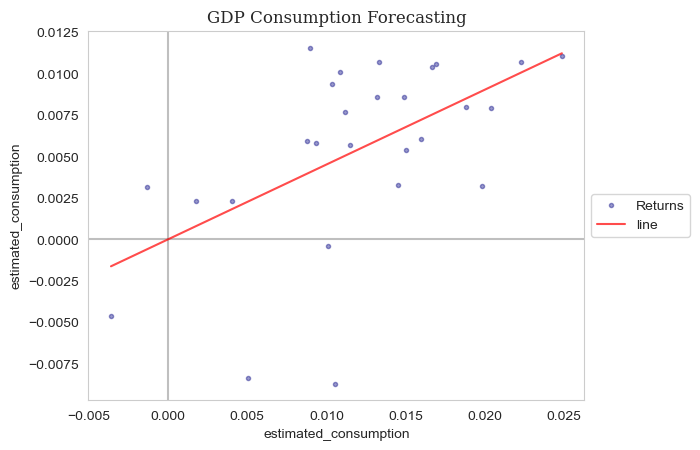

In [130]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [131]:
X_train

,retail_consumption,hushld_loan,durb_goods_sales,quas_drub_goods_sales,non_durb_goods_sales,tax,govern_exp_goods,govern_subsidy
2003-01-01,0.652,0.0706,-0.037,0.041,0.160,-0.080326,-0.401629,0.523189
2003-02-01,0.602,0.0690,-0.003,-0.065,-0.071,0.047212,-0.146007,0.197366
2003-03-01,0.605,0.0696,-0.083,-0.045,-0.035,0.349629,0.008813,0.189707
2003-04-01,0.603,0.0684,-0.087,-0.080,-0.020,0.164300,-0.012683,0.292769
2003-05-01,0.615,0.0664,-0.166,-0.054,0.062,0.070873,-0.014459,0.209872
...,...,...,...,...,...,...,...,...
2021-02-01,1.023,0.0281,0.168,0.107,0.038,0.235960,-0.038642,0.066153
2021-03-01,1.045,0.0288,0.132,0.364,0.025,0.272853,0.029946,0.122333
2021-04-01,1.055,0.0291,0.086,0.230,0.042,0.325191,0.040759,0.151292
2021-05-01,1.054,0.0289,0.039,0.049,0.030,0.368395,0.058744,0.084156


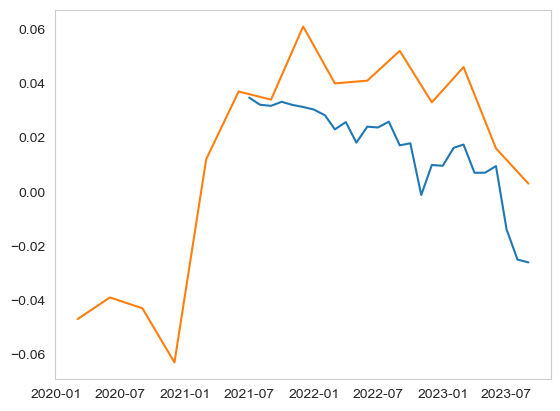

In [132]:
plt.plot(pd.Series(y_pred, index = X[fold:].index) * 3)
plt.plot(gdp_c['consumption_rate'][-15:].dropna())
plt.grid(False)

```
class DynamicForestRegressor(RandomForestRegressor) :
    def __init__(self, 
                 update_step : int, 
                 window : int = 12,
                 init_data : int = 120,
                 *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.update = update_step;
        self.window = window;
        self.init_data = init_data
        self.warm_start = True;
        self.n_estimators = 1000;
        self.criterion = 'suared_error';
        
    def fit(self, X, y, sample_weight = None, 
            verbose : bool = True) -> object:
        super().fit(X[:self.init_data], y[:self.init_data])
        for i in range(self.update) :
            if verbose == True : 
                print(f"Dynamic System Update {i+1} / {self.update}");
            super(DynamicForestRegressor, self).fit(X[(i+1) * self.window:self.init_data + (i+1) * self.window], 
                                                    y[(i+1) * self.window:self.init_data + (i+1) * self.window]);
```

In [133]:
model2 = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42,
                               criterion = 'squared_error',
                               max_depth = 10,
                               warm_start = True)
for i in range(9) :
    model2.fit(X_train[i*12: 120+i*12], y_train[i*12: 120 + i*12])
    model2.n_estimators += 1000
    print(f"Dynamic System Update {i+1} / {9}");

Dynamic System Update 1 / 9
Dynamic System Update 2 / 9
Dynamic System Update 3 / 9
Dynamic System Update 4 / 9
Dynamic System Update 5 / 9
Dynamic System Update 6 / 9
Dynamic System Update 7 / 9
Dynamic System Update 8 / 9
Dynamic System Update 9 / 9


In [134]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.714551485265112e-05


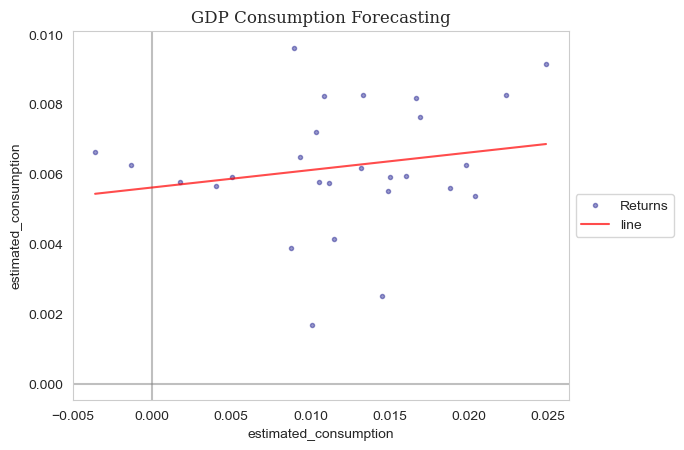

In [135]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

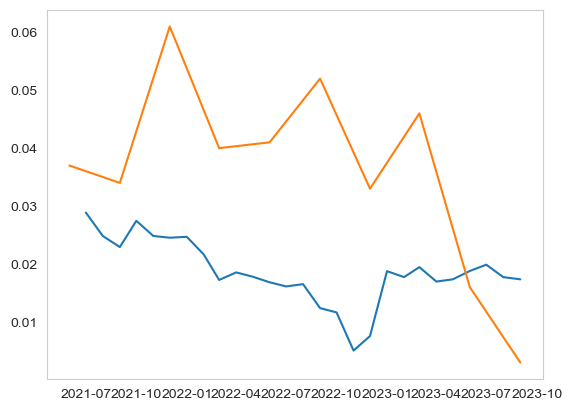

In [136]:
plt.plot(pd.Series(y_pred, index = X[fold:].index) * 3)
plt.plot(gdp_c['consumption_rate'][-10:].dropna())
plt.grid(False)

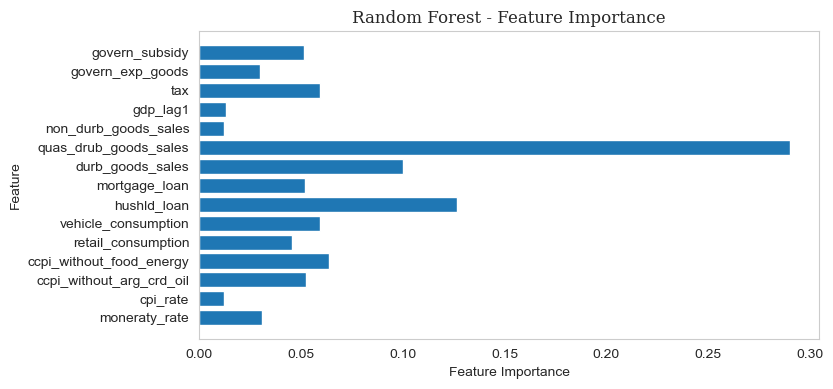

In [78]:
importance = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize = (8, 4))
plt.barh(range(len(importance)), importance, align="center")
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Random Forest - Feature Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [16]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(model, X_train, y_train, n_repeats = 30, random_state = 42)
feature_names = X_train.columns

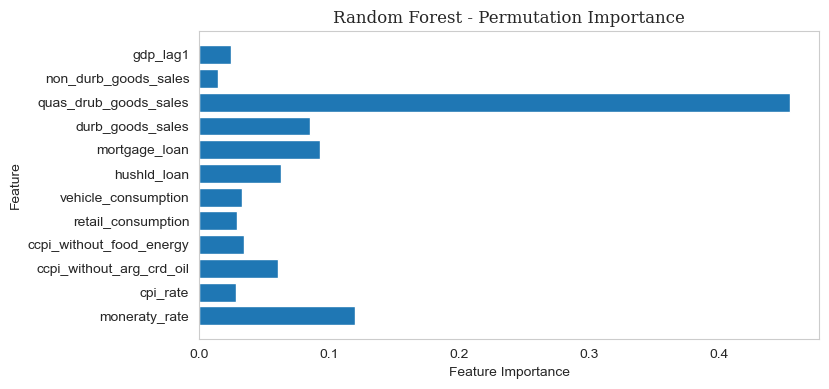

In [17]:
plt.figure(figsize = (8, 4))
plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], align="center")
plt.yticks(np.arange(len(importance['importances_mean'])), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Random Forest - Permutation Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [113]:
import shap

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)
shap_values_all = explainer_randomforest_reg(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


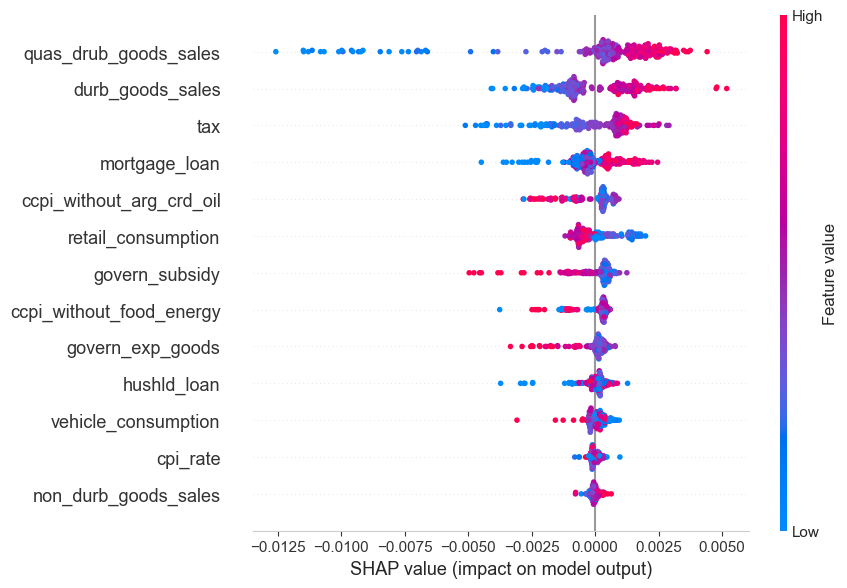

In [114]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


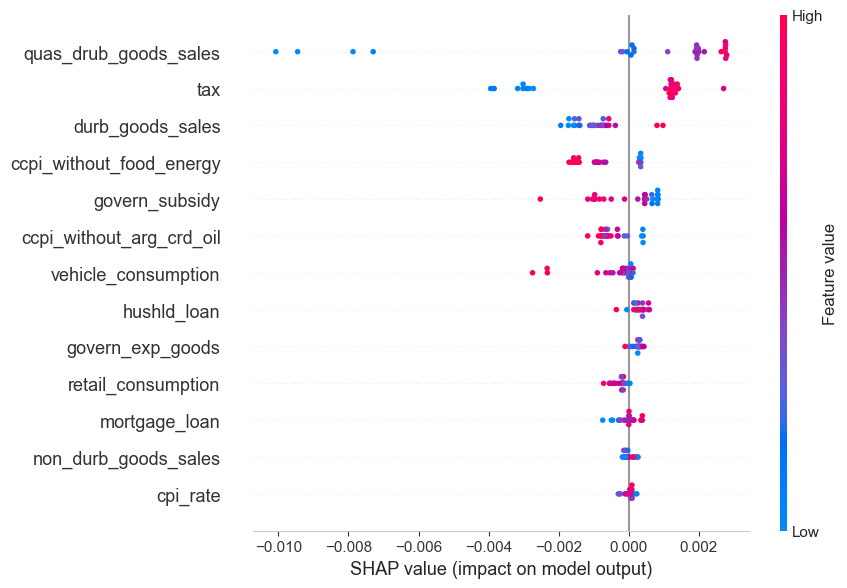

In [115]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))

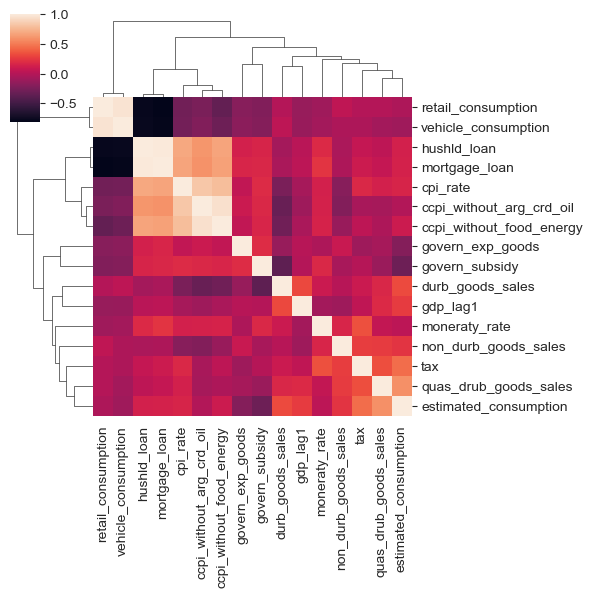

In [116]:
import seaborn as sns

sns.clustermap(consumption_matrix.corr(), figsize = (6,6))